# Univariate Analysis 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
ames = pd.read_csv('data/train.csv')
ames.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames.shape

(1460, 81)

In [10]:
def uni_categ(feature):
    print("Missing Value Count: {}".format(feature.isnull().sum()))
    print("Distribution: \n{}".format(feature.value_counts()/feature.shape[0]))

def uni_num(feature, bins=10):
    print("Missing Value Count: {}".format(feature.isnull().sum()))
    feature.hist(bins=bins)

---

### BldgType

In [11]:
uni_categ(ames['BldgType'])

Missing Value Count: 0
Distribution: 
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: BldgType, dtype: float64


### HouseStyle

In [12]:
uni_categ(ames['HouseStyle'])

Missing Value Count: 0
Distribution: 
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: HouseStyle, dtype: float64


In [13]:
ames.groupby('HouseStyle').mean()['SalePrice']

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

### OverallQual

In [14]:
uni_categ(ames['OverallQual'])

Missing Value Count: 0
Distribution: 
5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64


In [15]:
ames.groupby('OverallQual').mean()['SalePrice']

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

Yes, it is ordinal.

Missing Value Count: 0


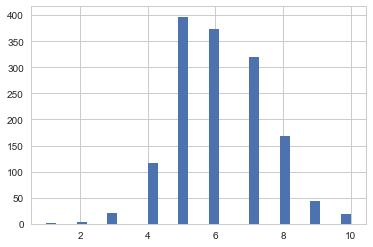

In [17]:
uni_num(ames['OverallQual'], bins=30)

### OverallCond

In [18]:
uni_categ(ames['OverallCond'])

Missing Value Count: 0
Distribution: 
5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64


In [19]:
ames.groupby('OverallCond').mean()['SalePrice']

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64

It is ordinal

Missing Value Count: 0


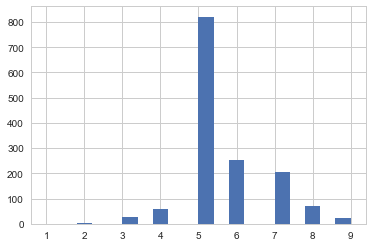

In [21]:
uni_num(ames['OverallCond'], bins=20)

### YearBuilt

In [22]:
ames['YearBuilt'].dtype

dtype('int64')

In [23]:
len(ames['YearBuilt'].unique())

112

Missing Value Count: 0


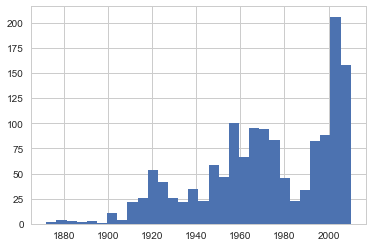

In [25]:
uni_num(ames['YearBuilt'], bins=30)

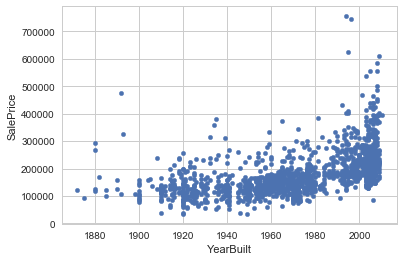

In [26]:
ames.plot.scatter('YearBuilt', 'SalePrice')

It might need feature engineering to convert into more useful format.

### YearRemodAdd

In [27]:
ames['YearRemodAdd'].dtype

dtype('int64')

Missing Value Count: 0


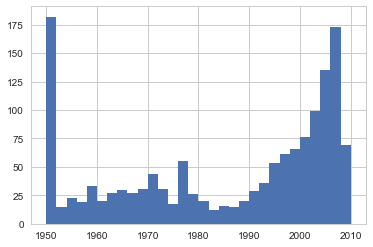

In [30]:
uni_num(ames['YearRemodAdd'], bins=30)

It might need feature engineering to convert into more useful format.

### RoofStyle

In [31]:
uni_categ(ames['RoofStyle'])

Missing Value Count: 0
Distribution: 
Gable      0.781507
Hip        0.195890
Flat       0.008904
Gambrel    0.007534
Mansard    0.004795
Shed       0.001370
Name: RoofStyle, dtype: float64


### RoofMatl

In [32]:
uni_categ(ames['RoofMatl'])

Missing Value Count: 0
Distribution: 
CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Membran    0.000685
ClyTile    0.000685
Metal      0.000685
Roll       0.000685
Name: RoofMatl, dtype: float64


In [33]:
ames.groupby('RoofMatl').mean()['SalePrice']

RoofMatl
ClyTile    160000.000000
CompShg    179803.679219
Membran    241500.000000
Metal      180000.000000
Roll       137000.000000
Tar&Grv    185406.363636
WdShake    241400.000000
WdShngl    390250.000000
Name: SalePrice, dtype: float64

### Exterior1st

In [34]:
uni_categ(ames['Exterior1st'])

Missing Value Count: 0
Distribution: 
VinylSd    0.352740
HdBoard    0.152055
MetalSd    0.150685
Wd Sdng    0.141096
Plywood    0.073973
CemntBd    0.041781
BrkFace    0.034247
WdShing    0.017808
Stucco     0.017123
AsbShng    0.013699
Stone      0.001370
BrkComm    0.001370
CBlock     0.000685
ImStucc    0.000685
AsphShn    0.000685
Name: Exterior1st, dtype: float64


### Exterior2nd

In [35]:
uni_categ(ames['Exterior2nd'])

Missing Value Count: 0
Distribution: 
VinylSd    0.345205
MetalSd    0.146575
HdBoard    0.141781
Wd Sdng    0.134932
Plywood    0.097260
CmentBd    0.041096
Wd Shng    0.026027
Stucco     0.017808
BrkFace    0.017123
AsbShng    0.013699
ImStucc    0.006849
Brk Cmn    0.004795
Stone      0.003425
AsphShn    0.002055
CBlock     0.000685
Other      0.000685
Name: Exterior2nd, dtype: float64


### MasVnrType

In [36]:
uni_categ(ames['MasVnrType'])

Missing Value Count: 8
Distribution: 
None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64


### MasVnrArea

Missing Value Count: 8


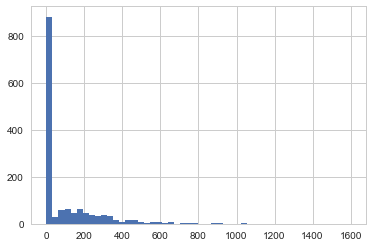

In [41]:
uni_num(ames['MasVnrArea'], bins=50)

In [40]:
ames['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

area = zero where MasVnrType = 'none'. Sounds fair. But the distribution is extremely right skewed. Could be converted into categorical area. 

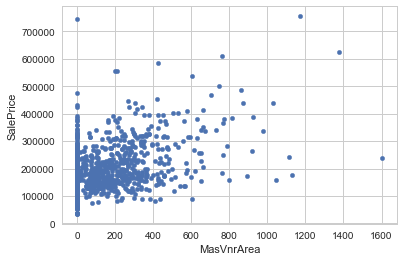

In [42]:
ames.plot.scatter('MasVnrArea', 'SalePrice')

Or its better to be dropped. Sorry for enetering into bivariate analysis premise.

### ExterQual

In [43]:
uni_categ(ames['ExterQual'])

Missing Value Count: 0
Distribution: 
TA    0.620548
Gd    0.334247
Ex    0.035616
Fa    0.009589
Name: ExterQual, dtype: float64


### ExterCond

In [44]:
uni_categ(ames['ExterCond'])

Missing Value Count: 0
Distribution: 
TA    0.878082
Gd    0.100000
Fa    0.019178
Ex    0.002055
Po    0.000685
Name: ExterCond, dtype: float64


### Foundation

In [45]:
uni_categ(ames['Foundation'])

Missing Value Count: 0
Distribution: 
PConc     0.443151
CBlock    0.434247
BrkTil    0.100000
Slab      0.016438
Stone     0.004110
Wood      0.002055
Name: Foundation, dtype: float64


### BsmtQual

In [46]:
uni_categ(ames['BsmtQual'])

Missing Value Count: 37
Distribution: 
TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64


Missing value means 'no basement'. Data type might be ordinal. Also there is no observation for 'Poor'.

In [47]:
ames.groupby('BsmtQual').mean()['SalePrice']

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64

### BsmtCond  


In [48]:
uni_categ(ames['BsmtCond'])

Missing Value Count: 37
Distribution: 
TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64


'Ex':'Excellent' category has no observations. missing values be treated as no basement.

In [49]:
ames.groupby('BsmtCond').mean()['SalePrice']

BsmtCond
Fa    121809.533333
Gd    213599.907692
Po     64000.000000
TA    183632.620900
Name: SalePrice, dtype: float64

### BsmtExposure

In [50]:
uni_categ(ames['BsmtExposure'])

Missing Value Count: 38
Distribution: 
No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64


missing values to be treated as 'No Basement'

In [51]:
ames.groupby('BsmtExposure').mean()['SalePrice']

BsmtExposure
Av    206643.420814
Gd    257689.805970
Mn    192789.657895
No    165652.295908
Name: SalePrice, dtype: float64

### BsmtFinType1

In [52]:
uni_categ(ames['BsmtFinType1'])

Missing Value Count: 37
Distribution: 
Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64


missing value = 'no basement'.

In [53]:
ames.groupby('BsmtFinType1').mean()['SalePrice']

BsmtFinType1
ALQ    161573.068182
BLQ    149493.655405
GLQ    235413.720096
LwQ    151852.702703
Rec    146889.248120
Unf    170670.576744
Name: SalePrice, dtype: float64

### BsmtFinSF1

Missing Value Count: 0


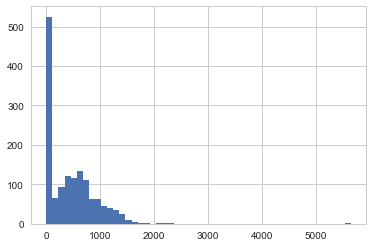

In [56]:
uni_num(ames['BsmtFinSF1'], bins=50)

Unfinished ('Unf') or no basement means 0 value. more than 1/3rd values are 0. Could be transformed into categorical or dropped.

### BsmtFinType2

In [57]:
uni_categ(ames['BsmtFinType2'])

Missing Value Count: 38
Distribution: 
Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64


missing = 'no basement'

### BsmtFinSF2

Missing Value Count: 0


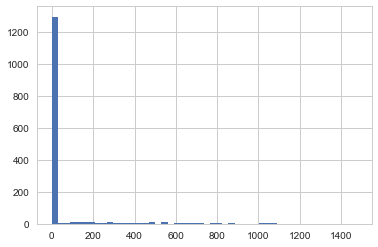

In [59]:
uni_num(ames['BsmtFinSF2'], bins = 50)

In [62]:
(ames['BsmtFinSF2'] == 0).sum()/1460

0.88561643835616444

almost 90% values 0. means not applicable. genuine value. but should be converted into categorical or dropped.

### BsmtUnfSF

Missing Value Count: 0


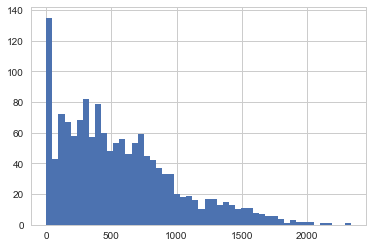

In [66]:
uni_num(ames['BsmtUnfSF'], bins=50)

### TotalBsmtSF

Missing Value Count: 0


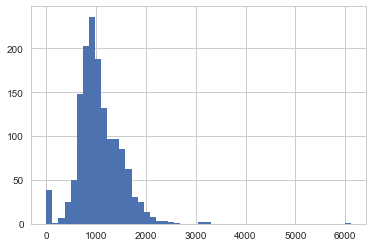

In [68]:
uni_num(ames['TotalBsmtSF'], bins=50)

few outliers. value 0 for house with no basement. 